<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(3_6)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_3.6'

In [4]:
os.listdir(base_path)

['data_add_delta_3.6_n250.csv',
 'data_add_delta_3.6_n120.csv',
 'data_add_delta_3.6_n60.csv',
 'data_add_delta_3.6_n30.csv',
 'data_add_delta_3.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.6_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,59.935677,99.790111,60.114893,-2357.756624,-2127.915944,306.965838,-2434.881782
1,0.0,1.0,50.827318,98.569759,33.614322,9061.271323,9254.282722,821.159937,8433.122786
2,0.0,2.0,24.545988,66.595584,92.084440,-3497.542471,-3304.316459,-453.369804,-2850.946655
3,0.0,3.0,50.592609,23.761123,40.223137,-201.293274,-76.716406,318.277861,-394.994268
4,0.0,4.0,99.865925,78.981380,92.221617,-3481.811627,-3200.742705,-448.723677,-2752.019027
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,98.965268,24.498232,51.806091,317.211992,502.481584,-449.679914,952.161498
119996,999.0,116.0,93.743166,86.395752,41.932430,-1598.102997,-1366.031648,80.439422,-1446.471070
119997,999.0,117.0,71.090345,54.959510,21.168766,424.720176,581.938797,200.446080,381.492717
119998,999.0,118.0,49.795764,94.164855,23.509605,-4509.610804,-4332.140580,696.045271,-5028.185851


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,59.935677,99.790111,60.114893,-2357.756624,-2127.915944,306.965838,-2434.881782
1,0.0,1.0,50.827318,98.569759,33.614322,9061.271323,9254.282722,821.159937,8433.122786
2,0.0,2.0,24.545988,66.595584,92.084440,-3497.542471,-3304.316459,-453.369804,-2850.946655
3,0.0,3.0,50.592609,23.761123,40.223137,-201.293274,-76.716406,318.277861,-394.994268
4,0.0,4.0,99.865925,78.981380,92.221617,-3481.811627,-3200.742705,-448.723677,-2752.019027
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,98.965268,24.498232,51.806091,317.211992,502.481584,-449.679914,952.161498
119996,999.0,116.0,93.743166,86.395752,41.932430,-1598.102997,-1366.031648,80.439422,-1446.471070
119997,999.0,117.0,71.090345,54.959510,21.168766,424.720176,581.938797,200.446080,381.492717
119998,999.0,118.0,49.795764,94.164855,23.509605,-4509.610804,-4332.140580,696.045271,-5028.185851


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    59.935677  99.790111  ...  306.965838 -2434.881782
      1.0    50.827318  98.569759  ...  821.159937  8433.122786
      2.0    24.545988  66.595584  ... -453.369804 -2850.946655
      3.0    50.592609  23.761123  ...  318.277861  -394.994268
      4.0    99.865925  78.981380  ... -448.723677 -2752.019027
...                ...        ...  ...         ...          ...
999.0 115.0  98.965268  24.498232  ... -449.679914   952.161498
      116.0  93.743166  86.395752  ...   80.439422 -1446.471070
      117.0  71.090345  54.959510  ...  200.446080   381.492717
      118.0  49.795764  94.164855  ...  696.045271 -5028.185851
      119.0  85.504609  90.507280  ...  170.691580  -543.326463

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    59.935677  99.790111  ...  306.965838 -2434.881782
      1.0    50.827318  98.569759  ...  821.159937  8433.122786
      2.0    24.545988  66.595584  ... -453.369804 -2850.946655
      3.0    50.592609  23.761123  ...  318.277861  -394.994268
      4.0    99.865925  78.981380  ... -448.723677 -2752.019027
...                ...        ...  ...         ...          ...
999.0 115.0  98.965268  24.498232  ... -449.679914   952.161498
      116.0  93.743166  86.395752  ...   80.439422 -1446.471070
      117.0  71.090345  54.959510  ...  200.446080   381.492717
      118.0  49.795764  94.164855  ...  696.045271 -5028.185851
      119.0  85.504609  90.507280  ...  170.691580  -543.326463

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,59.935677,99.790111,60.114893,-2357.756624,-2127.915944,306.965838,-2434.881782
1,0.0,1.0,50.827318,98.569759,33.614322,9061.271323,9254.282722,821.159937,8433.122786
2,0.0,2.0,24.545988,66.595584,92.084440,-3497.542471,-3304.316459,-453.369804,-2850.946655
3,0.0,3.0,50.592609,23.761123,40.223137,-201.293274,-76.716406,318.277861,-394.994268
4,0.0,4.0,99.865925,78.981380,92.221617,-3481.811627,-3200.742705,-448.723677,-2752.019027
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,98.965268,24.498232,51.806091,317.211992,502.481584,-449.679914,952.161498
119996,999.0,116.0,93.743166,86.395752,41.932430,-1598.102997,-1366.031648,80.439422,-1446.471070
119997,999.0,117.0,71.090345,54.959510,21.168766,424.720176,581.938797,200.446080,381.492717
119998,999.0,118.0,49.795764,94.164855,23.509605,-4509.610804,-4332.140580,696.045271,-5028.185851


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    59.935677  99.790111  ...  306.965838 -2434.881782
      1.0    50.827318  98.569759  ...  821.159937  8433.122786
      2.0    24.545988  66.595584  ... -453.369804 -2850.946655
      3.0    50.592609  23.761123  ...  318.277861  -394.994268
      4.0    99.865925  78.981380  ... -448.723677 -2752.019027
...                ...        ...  ...         ...          ...
999.0 115.0  98.965268  24.498232  ... -449.679914   952.161498
      116.0  93.743166  86.395752  ...   80.439422 -1446.471070
      117.0  71.090345  54.959510  ...  200.446080   381.492717
      118.0  49.795764  94.164855  ...  696.045271 -5028.185851
      119.0  85.504609  90.507280  ...  170.691580  -543.326463

[120000 rows x 7 columns]

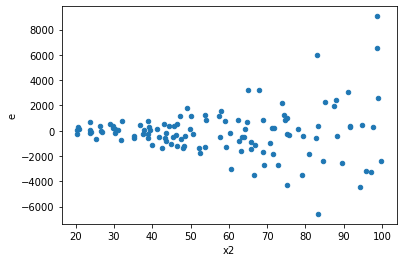

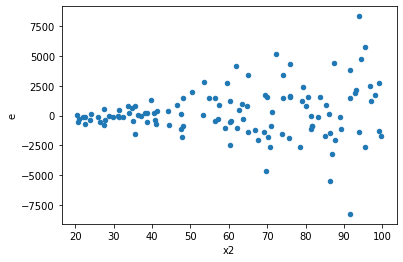

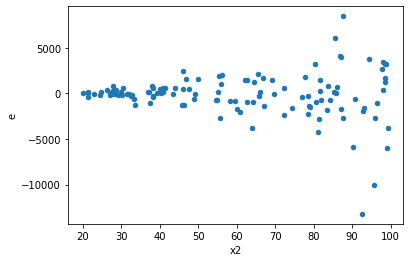

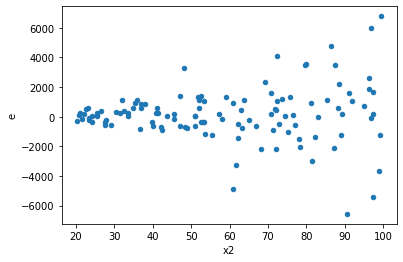

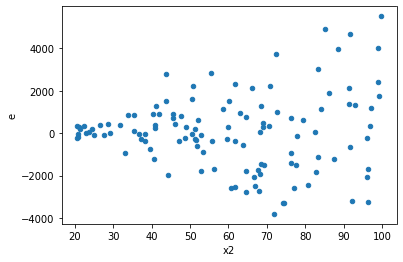

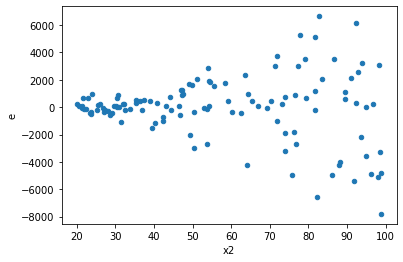

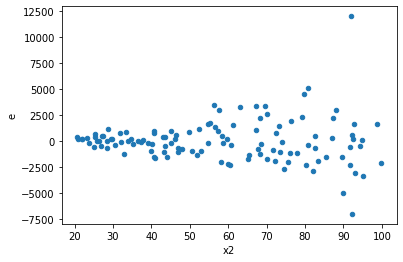

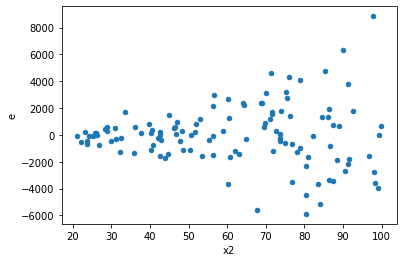

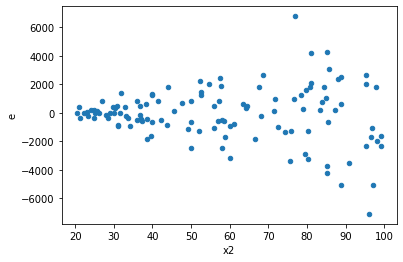

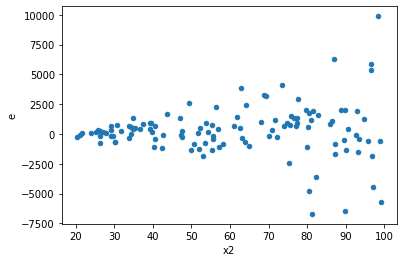

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,45.0,45.0,13680466.2400195,322458829.71717334,304010.36088932224,7165751.771492741,23.570748544657327,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,29176069.58793093,397601827.3880516,648357.1019540207,8835596.164178925,13.627669285259893,5.995204332975845e-15,0.999999999999997,2.9976021664879227e-15,Reject001=0 : Heteroscedasticity
2.0,45.0,45.0,18649360.86936165,575799369.2650093,414430.24154137,12795541.539222429,30.875018897348323,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
3.0,45.0,45.0,22711271.103462916,302807148.17302454,504694.913410287,6729047.737178323,13.332901835109256,9.103828801926284e-15,0.9999999999999954,4.551914400963142e-15,Reject001=0 : Heteroscedasticity
4.0,45.0,45.0,28848737.839675315,238496482.12943685,641083.0631038959,5299921.8250985965,8.267137489857028,7.033618132368247e-11,0.9999999999648319,3.5168090661841234e-11,Reject001=0 : Heteroscedasticity
5.0,45.0,45.0,12494488.678676229,503773920.424752,277655.30397058284,11194976.009438934,40.31969081572101,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
6.0,45.0,45.0,19791932.655916035,390150092.98480046,439820.725687023,8670002.0663289,19.712581877049796,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
7.0,45.0,45.0,27168709.43167722,413518766.0707855,603749.098481716,9189305.912684122,15.220405191151457,6.661338147750939e-16,0.9999999999999997,3.3306690738754696e-16,Reject001=0 : Heteroscedasticity
8.0,45.0,45.0,22709884.835320182,308831147.803969,504664.1074515596,6862914.395643756,13.598974633444673,6.217248937900877e-15,0.9999999999999969,3.1086244689504383e-15,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,13680466.2400195,322458829.71717334,304010.36088932224,7165751.771492741,23.570748544657327,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,29176069.58793093,397601827.3880516,648357.1019540207,8835596.164178925,13.627669285259893,5.995204332975845e-15,Reject001=0 : Heteroscedasticity
2.0,45.0,45.0,18649360.86936165,575799369.2650093,414430.24154137,12795541.539222429,30.875018897348323,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
3.0,45.0,45.0,22711271.103462916,302807148.17302454,504694.913410287,6729047.737178323,13.332901835109256,9.103828801926284e-15,Reject001=0 : Heteroscedasticity
4.0,45.0,45.0,28848737.839675315,238496482.12943685,641083.0631038959,5299921.8250985965,8.267137489857028,7.033618132368247e-11,Reject001=0 : Heteroscedasticity
5.0,45.0,45.0,12494488.678676229,503773920.424752,277655.30397058284,11194976.009438934,40.31969081572101,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
6.0,45.0,45.0,19791932.655916035,390150092.98480046,439820.725687023,8670002.0663289,19.712581877049796,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
7.0,45.0,45.0,27168709.43167722,413518766.0707855,603749.098481716,9189305.912684122,15.220405191151457,6.661338147750939e-16,Reject001=0 : Heteroscedasticity
8.0,45.0,45.0,22709884.835320182,308831147.803969,504664.1074515596,6862914.395643756,13.598974633444673,6.217248937900877e-15,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64